# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Jan 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

## Load Data
1. Use downloaded data from Kaggle, which has already been split into train and test sets
2. Don't hold-out any more data from train set since use the test set as hold-out data.
3. Even though we do not have Sale prices for the test set, we know roughly what a competitive log RMSE score is from Kaggle leaderboards.
4. In reality will hold-out some data from original dataset.

In [2]:
# Read .csv files
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

Sale price missing in test data, which is deliberate because of Kaggle competition. Concatenate train and test for cleaning and feature engineering, and split again prior to modelling.

## Data Exploration
1. Create useful initial summary of variables, which will help with missingness and feature engineering
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [159]:
def bespoke_pcorr(df, response, varname):
    response_corr = pd.DataFrame(df.corr(method='pearson')[response]).reset_index()
    response_corr.columns = [varname, 'PearsonCorr']
    return response_corr

def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor of the inter-quartile range according to the Tukey method.
    """
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   



# Make function later to nicely summarise relevant fields
def summarise_data(df, response):
    
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'Categorical' if df[x].dtype=='object' else 'Numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    
    tempdf.reset_index(drop=True, inplace=True)
    
    
    return tempdf


In [160]:
# Variables with missing values
summarydf = summarise_data(train,'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
72,PoolQC,7,1453,1460,0.995205,Categorical,3,0.0,NaN,0
74,MiscFeature,54,1406,1460,0.963014,Categorical,4,0.0,NaN,0
6,Alley,91,1369,1460,0.937671,Categorical,2,0.0,NaN,0
73,Fence,281,1179,1460,0.807534,Categorical,4,0.0,NaN,0
57,FireplaceQu,770,690,1460,0.472603,Categorical,5,0.0,NaN,0
3,LotFrontage,1201,259,1460,0.177397,Numerical,0,NaN,0.351799,30
58,GarageType,1379,81,1460,0.055479,Categorical,6,0.0,NaN,0
59,GarageYrBlt,1379,81,1460,0.055479,Numerical,0,NaN,0.486362,0
60,GarageFinish,1379,81,1460,0.055479,Categorical,3,0.0,NaN,0
63,GarageQual,1379,81,1460,0.055479,Categorical,5,0.0,NaN,0


In [161]:
# Categorical and Numerical variables
mask = summarydf.VariableType == 'Categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])

mask = summarydf.VariableType == 'Numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])


In [162]:
# Variables with skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'Numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,Numerical,0,24.451640,-0.021190,52
71,PoolArea,1460,0,1460,0.0,Numerical,0,14.813135,0.092404,7
4,LotArea,1460,0,1460,0.0,Numerical,0,12.195142,0.263843,69
69,3SsnPorch,1460,0,1460,0.0,Numerical,0,10.293752,0.044584,24
45,LowQualFinSF,1460,0,1460,0.0,Numerical,0,9.002080,-0.025606,26
52,KitchenAbvGr,1460,0,1460,0.0,Numerical,0,4.483784,-0.135907,68
36,BsmtFinSF2,1460,0,1460,0.0,Numerical,0,4.250888,-0.011378,167
70,ScreenPorch,1460,0,1460,0.0,Numerical,0,4.117977,0.111447,116
48,BsmtHalfBath,1460,0,1460,0.0,Numerical,0,4.099186,-0.016844,82
68,EnclosedPorch,1460,0,1460,0.0,Numerical,0,3.086696,-0.128578,208


In [163]:
# Variables that are highly correlated with SalePrice
mask = (np.abs(summarydf.PearsonCorr) > 0.5) & (summarydf.VariableType == 'Numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('PearsonCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
80,SalePrice,1460,0,1460,0.0,Numerical,0,1.880941,1.000000,61
17,OverallQual,1460,0,1460,0.0,Numerical,0,0.216721,0.790982,2
46,GrLivArea,1460,0,1460,0.0,Numerical,0,1.365156,0.708624,31
61,GarageCars,1460,0,1460,0.0,Numerical,0,-0.342197,0.640409,5
62,GarageArea,1460,0,1460,0.0,Numerical,0,0.179796,0.623431,21
38,TotalBsmtSF,1460,0,1460,0.0,Numerical,0,1.522688,0.613581,61
43,1stFlrSF,1460,0,1460,0.0,Numerical,0,1.375342,0.605852,20
49,FullBath,1460,0,1460,0.0,Numerical,0,0.036524,0.560664,0
54,TotRmsAbvGrd,1460,0,1460,0.0,Numerical,0,0.675646,0.533723,30
19,YearBuilt,1460,0,1460,0.0,Numerical,0,-0.612831,0.522897,7


In [164]:
# Variables with large number of outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'Numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,PearsonCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.000000,Numerical,0,3.086696,-0.128578,208
36,BsmtFinSF2,1460,0,1460,0.000000,Numerical,0,4.250888,-0.011378,167
18,OverallCond,1460,0,1460,0.000000,Numerical,0,0.692355,-0.077856,125
70,ScreenPorch,1460,0,1460,0.000000,Numerical,0,4.117977,0.111447,116
1,MSSubClass,1460,0,1460,0.000000,Numerical,0,1.406210,-0.084284,103
26,MasVnrArea,1452,8,1460,0.005479,Numerical,0,NaN,0.477493,96
48,BsmtHalfBath,1460,0,1460,0.000000,Numerical,0,4.099186,-0.016844,82
67,OpenPorchSF,1460,0,1460,0.000000,Numerical,0,2.361912,0.315856,77
4,LotArea,1460,0,1460,0.000000,Numerical,0,12.195142,0.263843,69
52,KitchenAbvGr,1460,0,1460,0.000000,Numerical,0,4.483784,-0.135907,68


In [6]:
def chart_singlevar_dist(df, response):
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    #ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

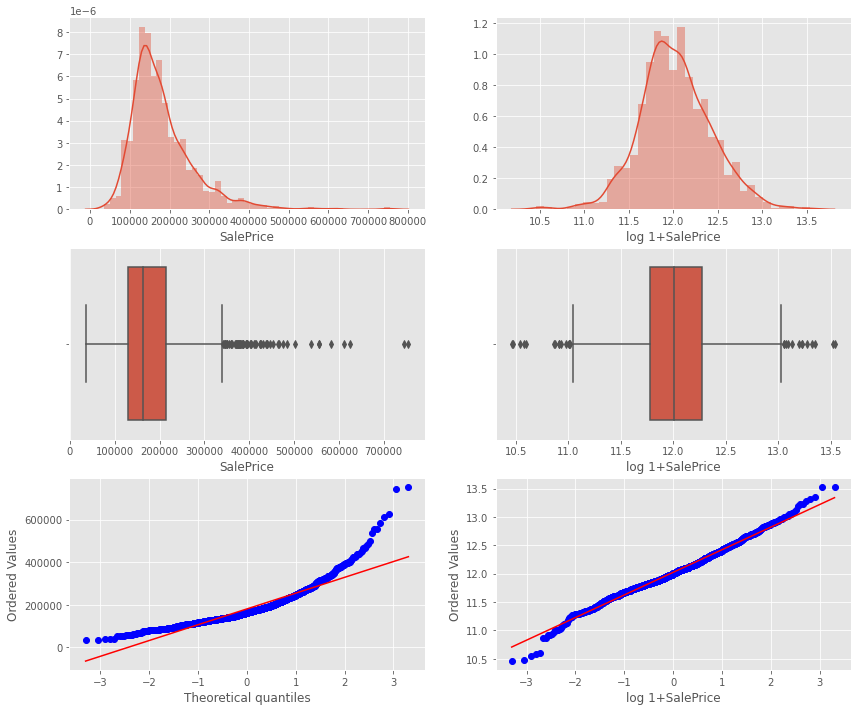

In [7]:
chart_singlevar_dist(train, 'SalePrice')

In [55]:
def corr_plot(df,varlist):
    train_corr = df[varlist].corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

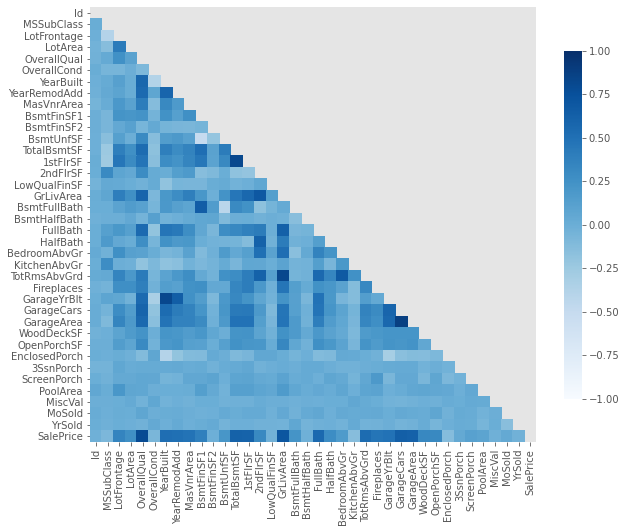

In [59]:
# Correlation plot of all variables
corr_plot(train,list(train.columns))

In [117]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = train.drop(['Id','SalePrice'], axis=1).corr(method='pearson').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1          var2       cor
0     GarageCars    GarageArea  0.986128
1      YearBuilt   GarageYrBlt  0.973001
2    TotalBsmtSF      1stFlrSF  0.964331
3      GrLivArea  TotRmsAbvGrd  0.944207
4   YearRemodAdd   GarageYrBlt  0.901431
5    OverallQual    GarageCars  0.896461
6      YearBuilt  YearRemodAdd  0.876491
7     BsmtFinSF1  BsmtFullBath  0.875490
8    OverallQual    GarageArea  0.871251
9    GarageYrBlt    GarageCars  0.846997
10  BedroomAbvGr  TotRmsAbvGrd  0.845900
11     YearBuilt    GarageCars  0.837271
12   OverallQual     YearBuilt  0.836299
13   OverallQual   GarageYrBlt  0.828565
14   OverallQual  YearRemodAdd  0.825378
15   OverallQual      FullBath  0.825283
16     GrLivArea      FullBath  0.821656
17      2ndFlrSF      HalfBath  0.812587
18   GarageYrBlt    GarageArea  0.811146
19     YearBuilt    GarageArea  0.805244
20   TotalBsmtSF    GarageArea  0.763880
21      FullBath  TotRmsAbvGrd  0.761889
22      FullBath    GarageCars  0.761067
23  YearRemodAdd

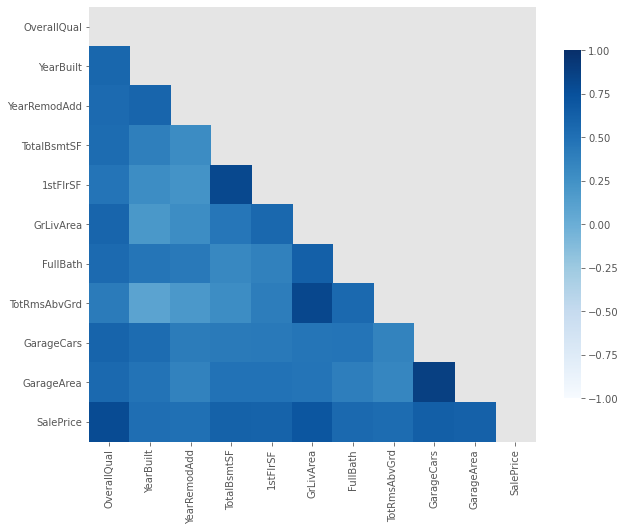

In [113]:
# Correlation plot of variables with >0.6 correlation with SalePrice
corr_plot(train,salescorr_vars)